Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


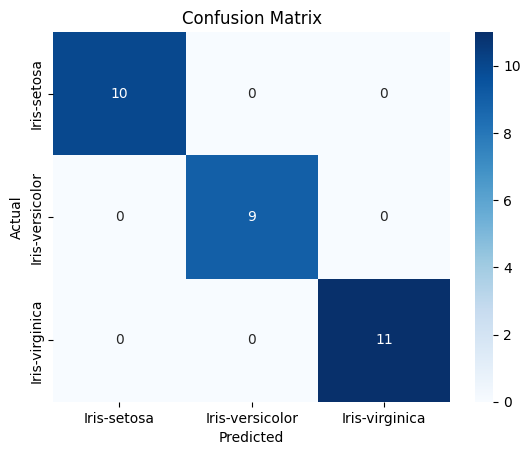

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('iris.csv')  # Replace 'iris.csv' with your file path

# Separate features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Display the confusion matrix using seaborn and matplotlib
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=data['species'].unique(),
            yticklabels=data['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


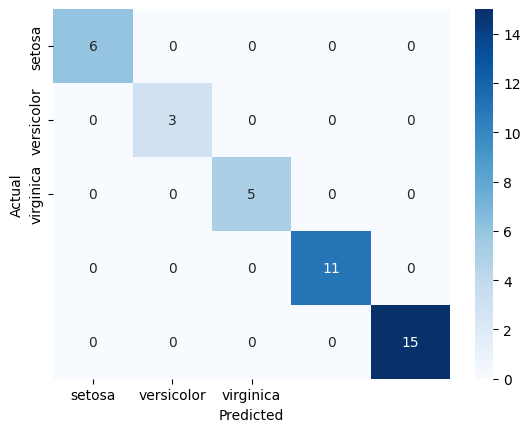

In [10]:
# prompt: Write Python code to implement the following. Consider dataset files as  “drug.csv”. Build a DecisionTree classifier to classify Drugdataset
# Use 80% of data for training and 20% for testing.
# Display accuracy score and confusion matrix of the trained model on test data.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('drug.csv')  # Replace 'drug.csv' with your file path

# Separate features (X) and target (y)
X = data.drop('Drug', axis=1)
y = data['Drug']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [5]:
# prompt: To Do: Implementation – Decision Tree(For
# Classification)
# Write Python code to implement the following. Consider dataset file “petrol_consumption.csv”
# Build a RegressionTree to predict petrol consumption
# Use 80% of data for training and 20% for testing.
# Display “Mean Absolute Error, Mean Squared Error, Root Mean Squared Error” for test data.

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np # Import numpy for square root calculation


# Function to build and evaluate a Regression Tree
def build_and_evaluate_regression_tree(data_file):
    """
    Builds a Regression Tree, trains it on a dataset, and evaluates its performance.

    Args:
        data_file: The path to the CSV file containing the dataset.

    Returns:
        None
    """
    df = pd.read_csv(data_file)

    # Assuming the last column is the target variable (petrol consumption)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Regression Tree
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    # Calculate RMSE manually if squared parameter is not available
    rmse = np.sqrt(mse)

    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)


# Build and evaluate Regression Tree for petrol consumption dataset
print("Regression Tree for Petrol Consumption dataset:")
build_and_evaluate_regression_tree("petrol_consumption.csv")

Regression Tree for Petrol Consumption dataset:
Mean Absolute Error: 88.2
Mean Squared Error: 15699.8
Root Mean Squared Error: 125.29884277199051
